# Designing_and_Creating_a_Database

In this project, we imported data into SQLite database, designed a normalized database schema, created tables matching the schema design and inserted/migrated data from unnormalized tables into normalized tables. We worked with a file of [Major League Baseball](https://en.wikipedia.org/wiki/Major_League_Baseball) games from [Retrosheet](http://www.retrosheet.org/). Retrosheet compiles detailed statistics on baseball games from the 1800s through to today. The main file is [`game_log.csv`]() and in addition to the main file, there are also three 'helper' files sourced from Retrosheet:

- [`park_codes.csv`]()
- [`person_codes.csv`]()
- [`team_codes.csv`]()

There is also another [`game_log_fields.txt`]() file from Retrosheet which explains the fields included in our main file.

In [1]:
# importing libraries
import sqlite3
import pandas as pd
import csv

In [2]:
# setting the following options to prevent dataframe output from
# being truncated, as the size of main game log file is much larger

pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [3]:
# reading file into pandas dataframe
# setting 'low_memory' to 'False' to ensure no mixed types
g_log = pd.read_csv('game_log.csv', low_memory=False)

In [4]:
# printing shape of the g_log dataframe
g_log.shape

(171907, 161)

In [5]:
# examining first rows of g_log dataframe
g_log.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

In [6]:
# examining last five rows of g_log dataframe
g_log.tail()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,0200000202,1100100010,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,barrs901,Scott Barry,woodt901,Tom Woodring,randt901,Tony Randazzo,ortir901,Roberto Ortiz,NaN,NaN,NaN,NaN,counc001,Craig Counsell,weisw001,Walt Weiss,thort001,Tyler Thornburg,rusic001,Chris Rusin,knebc001,Corey Knebel,susaa001,Andrew Susac,cravt001,Tyler Cravy,marqg001,German Marquez,villj001,Jonathan Villar,5.0,genns001,Scooter Gennett,4.0,cartc002,Chris Carter,3.0,santd002,Domingo Santana,9.0,pereh001,Hernan Perez,8.0,arcio002,Orlando Arcia,6.0,susaa001,Andrew Susac,2.0,elmoj001,Jake Elmore,7.0,cravt001,Tyler Cravy,1.0,blacc001,Charlie Blackmon,8.0,dahld001,David Dahl,7.0,arenn001,Nolan Arenado,5.0,gonzc001,Carlos Gonzalez,9.0,murpt002,Tom Murphy,2.0,pattj005,Jordan Patterson,3.0,valap001,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,000001100,00100031x,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,barkl901,Lance Barksdale,herna901,Angel Hernandez,barrt901,Ted Barrett,littw901,Will Little,NaN,NaN,NaN,NaN,collt801,Terr

The `game_log` dataframe has a record of more than 170,000 games and these games occur between 1871 and 2016 chronologically. For each game we have:

- team-level stats for each team
- the umpires that officiated the game
- some 'awards', like winning and losing pitcher
- a list of players from each team, numbered, with their defensive positions

Moreover, there appears to be no natural primary key column for this table.

In [7]:
# reading file into pandas dataframe
person_code = pd.read_csv('person_codes.csv')

# printing shape of the person_code dataframe
print(person_code.shape)

# examining first five rows of the dataframe
person_code.head()

(20494, 7)


,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN


The `person_code` dataframe has a list of people with IDs which appear to match up with those used in the g_log dataframe. There are, however, debut dates for players, managers, coaches and umpires and it is visible from table that some people might have been one or more of these roles (e.g. Tommie Aaron).

After doing some research, while managers in other sports are also called coach or head coach, this is not the case in baseball. In baseball, coaches are more specialized like base coach.

In [8]:
# reading file into pandas dataframe
park_code = pd.read_csv('park_codes.csv')

# printing shape of the park_code dataframe
print(park_code.shape)

# examining first five rows of the dataframe
park_code.head()

(252, 9)


,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN


The above dataframe, `park_code`, contains a list of all baseball parks and there are IDs which seem to match with the g_log, as well as city and league.

In [9]:
# reading file into pandas dataframe
team_code = pd.read_csv('team_codes.csv')

# printing shape of the team_code dataframe
print(team_code.shape)

# examining first five rows of the dataframe
team_code.head()

(150, 8)


,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1


The above dataframe, team_code, contains a list of all teams, with team_ids which seem to match the g_log dataframe. However, there is a column, franch_id, that appears interesting to look at.

In [10]:
# examining frequency of 'franch_id' column of the team_code dataframe
team_code.franch_id.value_counts().head()

BS1    4
MLA    3
BR3    3
LAA    3
PHA    3
Name: franch_id, dtype: int64

In [11]:
# filtering dataframe to show results for first 'franch_id'
team_code[team_code['franch_id'] == 'BS1']

,team_id,league,start,end,city,nickname,franch_id,seq
21,BS1,NaN,1871,1875,Boston,Braves,BS1,1
22,BSN,NL,1876,1952,Boston,Braves,BS1,2
23,MLN,NL,1953,1965,Milwaukee,Braves,BS1,3
24,ATL,NL,1966,0,Atlanta,Braves,BS1,4


Above results show that the team moves between cities and leagues and consequently the `team_id` changes. Moreover, `franch_id` probably appears to be Franchise that help us tie all these details together.

In [12]:
# examining the defensive positions slab
g_log.v_player_1_def_pos.value_counts()

8.0     38715
4.0     28458
6.0     22220
7.0     19595
9.0     14965
5.0     11923
3.0      3383
10.0     1062
2.0       515
1.0         2
Name: v_player_1_def_pos, dtype: int64

Next, we explored defensive position number in `g_log` dataframe which has a number between 1-10 and diving further into google, found an article [here](http://baseballcoachinglab.com/baseball-positions/), that gives us a list of names for each numbered position and its details:


1. Pitcher
2. Catcher
3. 1st Base
4. 2nd Base
5. 3rd Base
6. Shortstop
7. Left Field
8. Center Field
9. Right Field

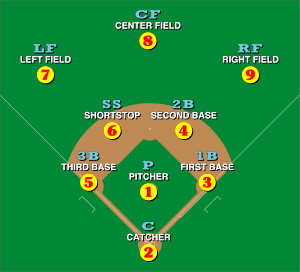

The 10th position isn't included because it may be a way of describing a designated hitter that does not field. However, in retrosheet page this position is indicated as 0 but we don't have any position 0 in our data and therefore we have chosen to make this an 'Unknown Position' and ignored it.

Next, we examined values in the various league fields and which leagues they represent.

In [13]:
# examining the leagues in the g_log dataframe
g_log.h_league.value_counts()

NL    88867
AL    74712
AA     5039
FL     1243
PL      532
UA      428
Name: h_league, dtype: int64

We found in wikipedia that there are two main leagues, National League (NL) and American League (AL), while above results show that there are more than two leagues in the main g_log dataframe.

In [14]:
# writing function to extract years of all leagues in the g_log dataframe
def league_years(league):
        league_game = g_log[g_log['h_league'] == league]
        first_date = league_game['date'].min()
        latest_date = league_game['date'].max()
        print('{} went from {} to {}'.format(league, first_date,
                                             latest_date))

for l in g_log['h_league'].unique():
    league_years(l)

nan went from nan to nan
NL went from 18760422 to 20161002
AA went from 18820502 to 18911006
UA went from 18840417 to 18841019
PL went from 18900419 to 18901004
AL went from 19010424 to 20161002
FL went from 19140413 to 19151003


Did some research for the leagues based on the above results and found below:

- NL: National League
- AL: American League
- AA: [American Association](https://en.wikipedia.org/wiki/American_Association_%2819th_century%29)
- FL: [Federal League](https://en.wikipedia.org/wiki/Federal_League)
- PL: [Players League](https://en.wikipedia.org/wiki/Players%27_League)
- UA: [Union Association](https://en.wikipedia.org/wiki/Union_Association)

In [15]:
# creating helper functions

db = 'mlb.db'

def run_query(query):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(query, conn)

# by default sqlite does not enforce foreign key restraints and therefore
# there is a need to enable to it in the execute command.
def run_command(command):
    with sqlite3.connect(db) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(command)       

def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ('table', 'view')
    '''
    return run_query(q)

In [16]:
# creating tables for each of our dataframes in SQLite db 'mlb.db'
tables = {
          'game_log': g_log,
          'person_codes': person_code, 
          'team_codes': team_code,
          'park_codes': park_code
         }

with sqlite3.connect(db) as conn:
    for table_name, df in tables.items():
        conn.execute('DROP TABLE IF EXISTS {}'.format(table_name))
        df.to_sql(table_name, conn, index=False)

In [17]:
# checking newly created tables in the db
show_tables()

,name,type
0,person,table
1,park,table
2,league,table
3,team,table
4,game,table
5,team_appearance,table
6,appearance_type,table
7,person_appearance,table
8,game_log,table
9,park_codes,table


We explored the Retrosheet site, where we found this [data dictionary](https://www.retrosheet.org/eventfile.htm) for their event files, which list every event within each game. This includes the following description:

*__id__: Each game begins with a twelve character ID record which identifies the date, home team, and number of the game. For example, `ATL198304080` should be read as follows. The first three characters identify the home team (the Braves). The next four are the year (1983). The next two are the month (April) using the standard numeric notation, 04, followed by the day (08). The last digit indicates if this is a single game (0), first game (1) or second game (2) if more than one game is played during a day, usually a double header The id record starts the description of a game thus ending the description of the preceding game in the file.*

Note, that this essentially makes a custom key using the three columns as done below.

In [18]:
# creating new column game_id in game_log table
command_1 = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT; 
'''
# including try/except loop since ALTER TABLE clause
# does not support IF NOT EXISTS
try:
    run_command(command_1)
except:
    pass

# currently game_log does not have a single column that can be used as a
# primary key to uniquely identify each game, therefore using SQL string
# concatenation to update the new columns with a unique ID, a combination
# of 'date', 'h_name', 'number_of_game' columns as mentioned in Retrosheet
command_2 = '''
UPDATE game_log
SET game_id = date || h_name || number_of_game
WHERE game_id is NULL
/* WHERE clause prevents above if it has already been done */;
'''
run_command(command_2)

# extracting table results after executing above commands
ext_q = '''
SELECT
    game_id,
    date,
    h_name,
    number_of_game
FROM game_log
LIMIT 5;
'''
run_query(ext_q)

,game_id,date,h_name,number_of_game
0,18710504FW10,18710504,FW1,0
1,18710505WS30,18710505,WS3,0
2,18710506RC10,18710506,RC1,0
3,18710508CH10,18710508,CH1,0
4,18710509TRO0,18710509,TRO,0


After looking at various files, following are opportunities for normalization of our data:

- In `person_codes`, all the debut dates will be able to be reproduced using game log data.
- In `team_codes`, the start, end and sequence columns will be able to be reproduced using game log data.
- In `park_codes`, the start and end years will be able to be reproduced using game log data. While technically the state is an attribute of the city, we might not want to have a an incomplete city/state table so we will leave this in.
- There are lots of places in game log where we have a player ID followed by the players name. We will be able to remove this and use the name data in `person_codes`
- In `game_log`, all offensive and defensive stats are repeated for the home team and the visiting team. We could break these out and have a table that lists each game twice, one for each team, and cut out this column repetition.
- Similarly, in `game_log`, we have a listing for 9 players on each team with their positions - we can remove these and have one table that tracks player appearances and their positions.
- We can do a similar thing with the umpires from `game_log`, instead of listing all four positions as columns, we can put the umpires either in their own table or make one table for players, umpires and managers.
- We have several awards in `game_log` like winning pitcher and losing pitcher. We can either break these out into their own table, have a table for awards, or combine the awards in with general appearances like the players and umpires.

#### Planning a normalized schema

Below is a snapshot of planned schema designed at [DbDesigner.net](https://dbdesigner.net/):

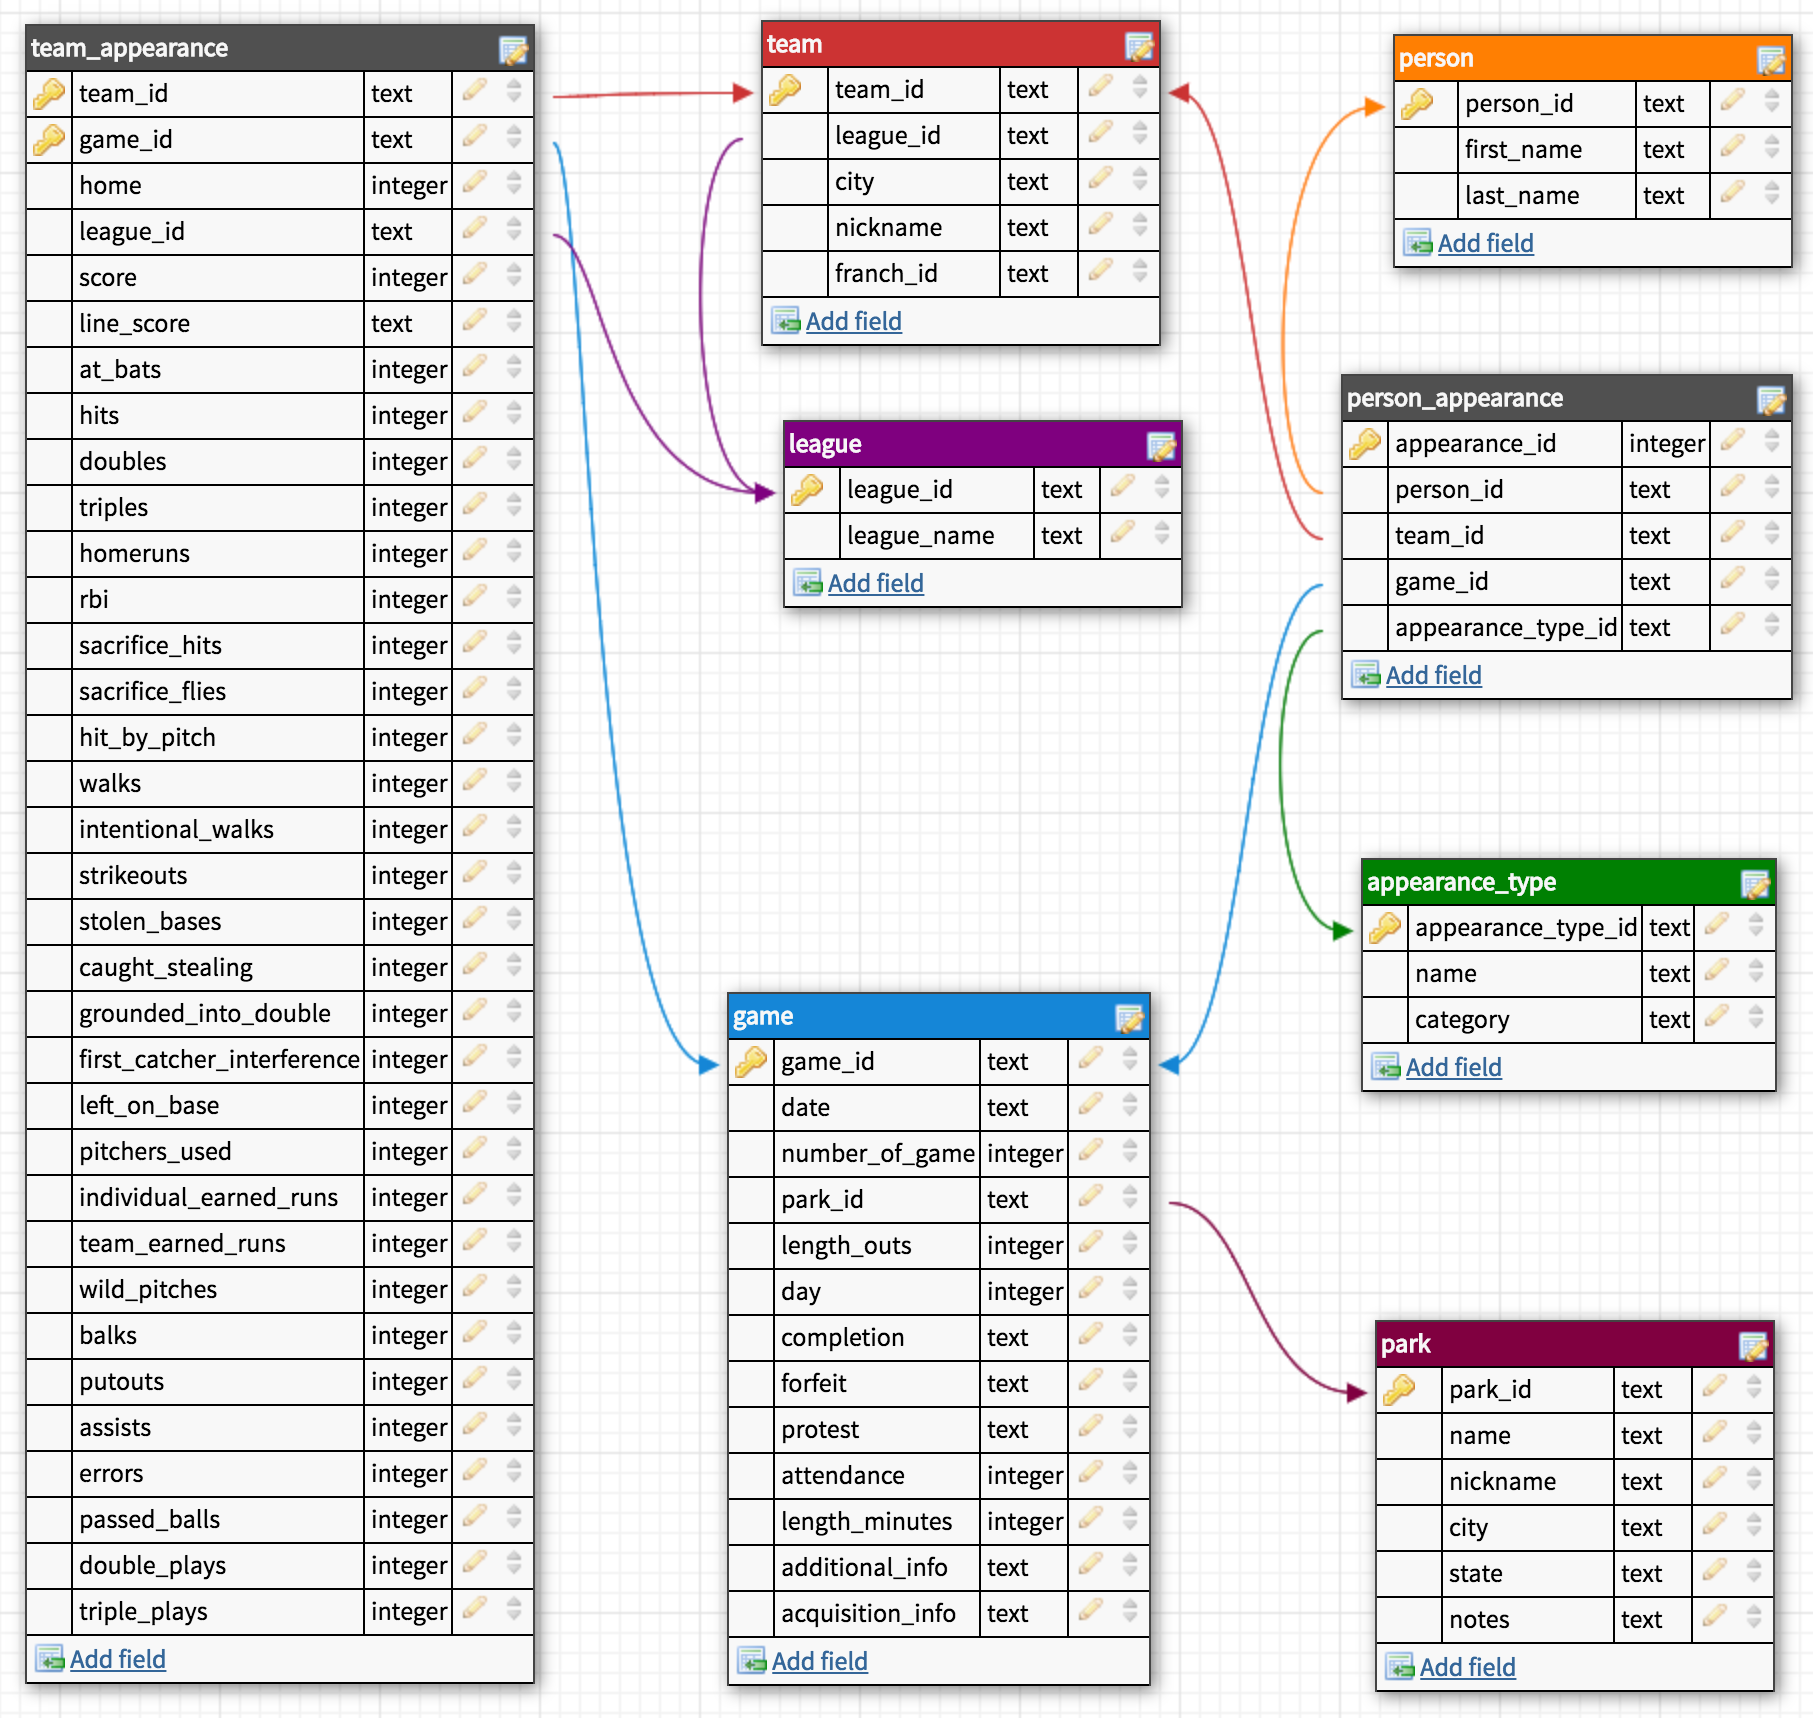

Creating the tables that don't contain any foreign key relations. It's important to start with these tables, as other tables will have relations to these tables, and so these tables will need to exist first.

The tables we created are below, with some notes on the normalization choices made:

`person`
- Each of the 'debut' columns have been omitted, as the data will be able to be found from other tables.
- Since the game log file has no data on coaches, we made the decision to not include this data.

`park`
- The start, end, and league columns contain data that is found in the main game log and can be removed.

`league`
- Because some of the older leagues are not well known, we will create a table to store league names.

`appearance_type`
- Our appearance table will include data on players with positions, umpires, managers, and awards (like winning pitcher). This table will store information on what different types of appearances are available.

In [19]:
# printing few rows of person_code df
person_code.head(2)

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN


In [20]:
# creating table without foreign key

c1 = '''
CREATE TABLE IF NOT EXISTS person (
    person_id TEXT PRIMARY KEY,
    first_name TEXT,
    last_name TEXT
);
'''
c2 = '''
INSERT OR IGNORE INTO person
SELECT
    id,
    first,
    last
FROM person_codes;
'''
q = '''
SELECT *
FROM person
LIMIT 5;
'''
run_command(c1)
run_command(c2)
run_query(q)

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


In [21]:
# printing few rows of park_code df
park_code.head(2)

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN


In [22]:
# creating another table without foreign key
c1 = '''
CREATE TABLE IF NOT EXISTS park (
    park_id TEXT PRIMARY KEY,
    name TEXT,
    nickname TEXT,
    city TEXT,
    state TEXT,
    notes TEXT
);
'''
c2 = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM park_codes;
'''
q = '''
SELECT *
FROM park
LIMIT 5;
'''
run_command(c1)
run_command(c2)
run_query(q)

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


league names

- NL: National League
- AL: American League
- AA: American Association
- FL: Federal League
- PL: Players League
- UA: Union Association

In [23]:
# creating another table without foreign key
c1 = '''
CREATE TABLE IF NOT EXISTS league (
    league_id TEXT PRIMARY KEY,
    name TEXT
);
'''
c2 = '''
INSERT OR IGNORE INTO league
VALUES
    ('NL', 'National League'),
    ('AL', 'American League'),
    ('AA', 'American Association'),
    ('FL', 'Federal League'),
    ('PL', 'Players League'),
    ('UA', 'Union Association');
'''
q = '''
SELECT *
FROM league;
'''
run_command(c1)
run_command(c2)
run_query(q)

,league_id,name
0,NL,National League
1,AL,American League
2,AA,American Association
3,FL,Federal League
4,PL,Players League
5,UA,Union Association


In [27]:
# disabling foreign key restraints
def run_command(c):
    with sqlite3.connect(db) as conn:
        #conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)

# dropping/removing table if already exist
c1 = '''
DROP TABLE IF EXISTS appearance_type;
'''
run_command(c1)

# creating another table without foreign key
c2 = '''
CREATE TABLE IF NOT EXISTS appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT
);
'''
run_command(c2)

# reading 'appearance_type.csv' into pandas and converting to sql
appearance_type = pd.read_csv('appearance_type.csv')

with sqlite3.connect(db) as conn:
    appearance_type.to_sql('appearance_type', conn,
                           index=False, if_exists='append')

q = '''
SELECT *
FROM appearance_type;
'''
run_query(q)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


Creating the tables that do contain any foreign key relations. Below are two tables and notes on the normalization choices made with creating both 'team' and 'game' tables:

`team`
- The start, end, and sequence columns can be derived from the game level data.

`game`
- We have chosen to include all columns for the game log that don't refer to one specific team or player, instead putting those in two appearance tables.
- We have removed the column with the day of the week, as this can be derived from the date.
- We have changed the day_night column to day, with the intention of making this a boolean column.

In [28]:
# printing few rows of team_code df
team_code.head(2)

,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1


In [29]:
# Creating 'team' table having foreign key relationship

c1 = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    city TEXT,
    nickname TEXT,
    franch_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);
'''
c2 = '''
INSERT OR IGNORE INTO team
SELECT
    team_id,
    league,
    city,
    nickname,
    franch_id
FROM team_codes;    
'''
q = '''
SELECT *
FROM team
LIMIT 5;
'''
run_command(c1)
run_command(c2)
run_query(q)

,team_id,league_id,city,nickname,franch_id
0,ALT,UA,Altoona,Mountain Cities,ALT
1,ARI,NL,Arizona,Diamondbacks,ARI
2,BFN,NL,Buffalo,Bisons,BFN
3,BFP,PL,Buffalo,Bisons,BFP
4,BL1,None,Baltimore,Canaries,BL1


In [30]:
# extracting game_log db table
game_q = '''
SELECT *
FROM game_log
LIMIT 3;
'''
run_query(game_q)

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710504,0,Thu,CL1,None,1,FW1,None,1,0,2,54.0,D,None,None,None,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,6.0,1.0,None,-1.0,None,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,None,0.0,0.0,None,-1.0,None,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,None,None,None,None,None,None,None,None,None,None,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,None,None,None,None,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,None,Y,18710504FW10
1,18710505,0,Fri,BS1,None,1,WS3,None,1,20,18,54.0,D,None,None,None,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,None,5.0,3.0,None,-1.0,None,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,None,2.0,1.0,None,-1.0,None,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,None,None,None,None,None,None,None,None,None,None,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,None,None,None,None,spala101,Al

In [31]:
# creating 'game' table having foreign key relationship
c1 = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date TEXT,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs INTEGER,
    day BOOLEAN,
    completion TEXT,
    forefeit TEXT,
    protest TEXT,
    attendance INTEGER,
    length_minutes INTEGER,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
);
'''
c2 = '''
INSERT OR IGNORE INTO game
SELECT
    game_id,
    date,
    number_of_game,
    park_id,
    length_outs,
    CASE
        WHEN day_night = 'D' THEN 1
        WHEN day_night = 'N' THEN 0
        ELSE NULL
    END AS day,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
'''
q = '''
SELECT *
FROM game
LIMIT 5;
'''
run_command(c1)
run_command(c2)
run_query(q)

,game_id,date,number_of_game,park_id,length_outs,day,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,18710504FW10,18710504,0,FOR01,54,1,None,None,None,200,120,None,Y
1,18710505WS30,18710505,0,WAS01,54,1,None,None,None,5000,145,HTBF,Y
2,18710506RC10,18710506,0,RCK01,54,1,None,None,None,1000,140,None,Y
3,18710508CH10,18710508,0,CHI01,54,1,None,None,None,5000,150,None,Y
4,18710509TRO0,18710509,0,TRO01,54,1,None,None,None,3250,145,HTBF,Y


In [32]:
# extracting schema from the game_log table as a reference for creating tables 
q = '''
SELECT sql FROM sqlite_master
WHERE name = "game_log"
  AND type = "table";
'''
run_query(q)

sql
0  CREATE TABLE "game_log" (\n"date" INTEGER,\n  "number_of_game" INTEGER,\n  "day_of_week" TEXT,\n  "v_name" TEXT,\n  "v_league" TEXT,\n  "v_game_number" INTEGER,\n  "h_name" TEXT,\n  "h_league" TEXT,\n  "h_game_number" INTEGER,\n  "v_score" INTEGER,\n  "h_score" INTEGER,\n  "length_outs" REAL,\n  "day_night" TEXT,\n  "completion" TEXT,\n  "forefeit" TEXT,\n  "protest" TEXT,\n  "park_id" TEXT,\n  "attendance" REAL,\n  "length_minutes" REAL,\n  "v_line_score" TEXT,\n  "h_line_score" TEXT,\n  "v_at_bats" REAL,\n  "v_hits" REAL,\n  "v_doubles" REAL,\n  "v_triples" REAL,\n  "v_homeruns" REAL,\n  "v_rbi" REAL,\n  "v_sacrifice_hits" REAL,\n  "v_sacrifice_flies" REAL,\n  "v_hit_by_pitch" REAL,\n  "v_walks" REAL,\n  "v_intentional_walks" REAL,\n  "v_strikeouts" REAL,\n  "v_stolen_bases" REAL,\n  "v_caught_stealing" REAL,\n  "v_grounded_into_double" REAL,\n  "v_first_catcher_interference" REAL,\n  "v_left_on_base" REAL,\n  "v_pitchers_used" REAL,\n  "v_individual_earned_runs" REAL,\n  "v_team_earned_runs" REAL,\n  "v_wild_pitches" REAL,\n  "v_balks" REAL,\n  "v_putouts" REAL,\n  "v_assists" REAL,\n  "v_errors" REAL,\n  "v_passed_balls" REAL,\n  "v_double_plays" REAL,\n  "v_triple_plays" REAL,\n  "h_at_bats" REAL,\n  "h_hits" REAL,\n  "h_doubles" REAL,\n  "h_triples" REAL,\n  "h_homeruns" REAL,\n  "h_rbi" REAL,\n  "h_sacrifice_hits" REAL,\n  "h_sacrifice_flies" REAL,\n  "h_hit_by_pitch" REAL,\n  "h_walks" REAL,\n  "h_intentional_walks" REAL,\n  "h_strikeouts" REAL,\n  "h_stolen_bases" REAL,\n  "h_caught_stealing" REAL,\n  "h_grounded_into_double" REAL,\n  "h_first_catcher_interference" REAL,\n  "h_left_on_base" REAL,\n  "h_pitchers_used" REAL,\n  "h_individual_earned_runs" REAL,\n  "h_team_earned_runs" REAL,\n  "h_wild_pitches" REAL,\n  "h_balks" REAL,\n  "h_putouts" REAL,\n  "h_assists" REAL,\n  "h_errors" REAL,\n  "h_passed_balls" REAL,\n  "h_double_plays" REAL,\n  "h_triple_plays" REAL,\n  "hp_umpire_id" TEXT,\n  "hp_umpire_name" TEXT,\n  "1b_umpire_id" TEXT,\n  "1b_umpire_name" TEXT,\n  "2b_umpire_id" TEXT,\n  "2b_umpire_name" TEXT,\n  "3b_umpire_id" TEXT,\n  "3b_umpire_name" TEXT,\n  "lf_umpire_id" TEXT,\n  "lf_umpire_name" TEXT,\n  "rf_umpire_id" TEXT,\n  "rf_umpire_name" TEXT,\n  "v_manager_id" TEXT,\n  "v_manager_name" TEXT,\n  "h_manager_id" TEXT,\n  "h_manager_name" TEXT,\n  "winning_pitcher_id" TEXT,\n  "winning_pitcher_name" TEXT,\n  "losing_pitcher_id" TEXT,\n  "losing_pitcher_name" TEXT,\n  "saving_pitcher_id" TEXT,\n  "saving_pitcher_name" TEXT,\n  "winning_rbi_batter_id" TEXT,\n  "winning_rbi_batter_id_name" TEXT,\n  "v_starting_pitcher_id" TEXT,\n  "v_starting_pitcher_name" TEXT,\n  "h_starting_pitcher_id" TEXT,\n  "h_starting_pitcher_name" TEXT,\n  "v_player_1_id" TEXT,\n  "v_player_1_name" TEXT,\n  "v_player_1_def_pos" REAL,\n  "v_player_2_id" TEXT,\n  "v_player_2_name" TEXT,\n  "v_player_2_def_pos" REAL,\n  "v_player_3_id" TEXT,\n  "v_player_3_name" TEXT,\n  "v_player_3_def_pos" REAL,\n  "v_player_4_id" TEXT,\n  "v_player_4_name" TEXT,\n  "v_player_4_def_pos" REAL,\n  "v_player_5_id" TEXT,\n  "v_player_5_name" TEXT,\n  "v_player_5_def_pos" REAL,\n  "v_player_6_id" TEXT,\n  "v_player_6_name" TEXT,\n  "v_player_6_def_pos" REAL,\n  "v_player_7_id" TEXT,\n  "v_player_7_name" TEXT,\n  "v_player_7_def_pos" REAL,\n  "v_player_8_id" TEXT,\n  "v_player_8_name" TEXT,\n  "v_player_8_def_pos" REAL,\n  "v_player_9_id" TEXT,\n  "v_player_9_name" TEXT,\n  "v_player_9_def_pos" REAL,\n  "h_player_1_id" TEXT,\n  "h_player_1_name" TEXT,\n  "h_player_1_def_pos" REAL,\n  "h_player_2_id" TEXT,\n  "h_player_2_name" TEXT,\n  "h_player_2_def_pos" REAL,\n  "h_player_3_id" TEXT,\n  "h_player_3_name" TEXT,\n  "h_player_3_def_pos" REAL,\n  "h_player_4_id" TEXT,\n  "h_player_4_name" TEXT,\n  "h_player_4_def_pos" REAL,\n  "h_player_5_id" TEXT,\n  "h_player_5_name" TEXT,\n  "h_player_5_def_pos" REAL,\n  "h_player_6_id" TEXT,\n  "h_player_6_name" TEXT,\n  "h_player_6_def_pos" REAL,\n  "h_player_7_id" TEXT,\n  "h_player_7_name" TEXT,\n  "h_playe

In [33]:
# creating 'team_appearance' table having foreign key relationship

c1 = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home BOOLEAN,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,
    at_bats INTEGER,
    hits INTEGER,
    doubles INTEGER,
    triples INTEGER,
    homeruns INTEGER,
    rbi INTEGER,
    sacrifice_hits INTEGER,
    sacrifice_flies INTEGER,
    hit_by_pitch INTEGER,
    walks INTEGER,
    intentional_walks INTEGER,
    strikeouts INTEGER,
    stolen_bases INTEGER,
    caught_stealing INTEGER,
    grounded_into_double INTEGER,
    first_catcher_interference INTEGER,
    left_on_base INTEGER,
    pitchers_used INTEGER,
    individual_earned_runs INTEGER,
    team_earned_runs INTEGER,
    wild_pitches INTEGER,
    balks INTEGER,
    putouts INTEGER,
    assists INTEGER,
    errors INTEGER,
    passed_balls INTEGER,
    double_plays INTEGER,
    triple_plays INTEGER,
    PRIMARY KEY (team_id, game_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);
'''
c2 = '''
INSERT OR IGNORE INTO team_appearance
SELECT
        h_name,
        game_id,
        1 AS home, /* 1 as home */
        h_league,
        h_score,
        h_line_score,
        h_at_bats,
        h_hits,
        h_doubles,
        h_triples,
        h_homeruns,
        h_rbi,
        h_sacrifice_hits,
        h_sacrifice_flies,
        h_hit_by_pitch,
        h_walks,
        h_intentional_walks,
        h_strikeouts,
        h_stolen_bases,
        h_caught_stealing,
        h_grounded_into_double,
        h_first_catcher_interference,
        h_left_on_base,
        h_pitchers_used,
        h_individual_earned_runs,
        h_team_earned_runs,
        h_wild_pitches,
        h_balks,
        h_putouts,
        h_assists,
        h_errors,
        h_passed_balls,
        h_double_plays,
        h_triple_plays
FROM game_log

UNION

SELECT    
        v_name,
        game_id,
        0 AS home, /* 0 as away */
        v_league,
        v_score,
        v_line_score,
        v_at_bats,
        v_hits,
        v_doubles,
        v_triples,
        v_homeruns,
        v_rbi,
        v_sacrifice_hits,
        v_sacrifice_flies,
        v_hit_by_pitch,
        v_walks,
        v_intentional_walks,
        v_strikeouts,
        v_stolen_bases,
        v_caught_stealing,
        v_grounded_into_double,
        v_first_catcher_interference,
        v_left_on_base,
        v_pitchers_used,
        v_individual_earned_runs,
        v_team_earned_runs,
        v_wild_pitches,
        v_balks,
        v_putouts,
        v_assists,
        v_errors,
        v_passed_balls,
        v_double_plays,
        v_triple_plays
From game_log;
'''
q = '''
SELECT *
FROM team_appearance
WHERE game_id = (
                 SELECT MIN(game_id) FROM game
                )
OR game_id = (
              SELECT MAX(game_id) FROM game
             )
ORDER BY game_id, home;
'''
run_command(c1)
run_command(c2)
run_query(q)

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,CL1,18710504FW10,0,None,0,000000000,30,4,1,0,0,0,0,0,0,1,NaN,6,1,NaN,-1,NaN,4,1,1,1,0,0,27,9,0,3,0,0
1,FW1,18710504FW10,1,None,2,010010000,31,4,1,0,0,2,0,0,0,1,NaN,0,0,NaN,-1,NaN,3,1,0,0,0,0,27,3,3,1,1,0
2,MIA,20161002WAS0,0,NL,7,000230020,38,14,1,1,2,7,1,0,0,3,2.0,10,1,1.0,1,0.0,8,7,10,10,1,0,24,11,0,0,1,0
3,WAS,20161002WAS0,1,NL,10,03023002x,30,10,2,0,1,10,1,1,1,8,0.0,3,2,0.0,1,0.0,7,6,7,7,1,0,27,11,0,0,1,0


In [34]:
# creating 'person_appearance' table having foreign key relationship

c1 = 'DROP TABLE IF EXISTS person_appearance;'

run_command(c1)

c2 = '''
CREATE TABLE person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    appearance_type_id,
    FOREIGN KEY (person_id) REFERENCES person(person_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (appearance_type_id) REFERENCES appearance_type(appearance_type_id)
);
'''
# inserting the data from the game_log table, using UNION clauses to combine the data from
# the columns for managers, umpires, pitchers, and awards
c3 = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
) 
    SELECT
        game_id,
        NULL,
        hp_umpire_id,
        "UHP"
    FROM game_log
    WHERE hp_umpire_id IS NOT NULL    

UNION

    SELECT
        game_id,
        NULL,
        [1b_umpire_id], /* we enclosed column name starting with number by square brackerts [] to
                        prevent sql from interpreting any token starting with a numeric character
                        as a number */
        "U1B"
    FROM game_log
    WHERE "1b_umpire_id" IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        [2b_umpire_id],
        "U2B"
    FROM game_log
    WHERE [2b_umpire_id] IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        [3b_umpire_id],
        "U3B"
    FROM game_log
    WHERE [3b_umpire_id] IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        lf_umpire_id,
        "ULF"
    FROM game_log
    WHERE lf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        rf_umpire_id,
        "URF"
    FROM game_log
    WHERE rf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        v_name,
        v_manager_id,
        "MM"
    FROM game_log
    WHERE v_manager_id IS NOT NULL

UNION

    SELECT
        game_id,
        h_name,
        h_manager_id,
        "MM"
    FROM game_log
    WHERE h_manager_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_pitcher_id,
        "AWP"
    FROM game_log
    WHERE winning_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score < v_score THEN h_name
            ELSE v_name
            END,
        losing_pitcher_id,
        "ALP"
    FROM game_log
    WHERE losing_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        saving_pitcher_id,
        "ASP"
    FROM game_log
    WHERE saving_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            ELSE v_name
            END,
        winning_rbi_batter_id,
        "AWB"
    FROM game_log
    WHERE winning_rbi_batter_id IS NOT NULL

UNION

    SELECT
        game_id,
        v_name,
        v_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE v_starting_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        h_name,
        h_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE h_starting_pitcher_id IS NOT NULL;
'''

template = '''
INSERT INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
) 
    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "O{num}"
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL

UNION

    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "D" || CAST({hv}_player_{num}_def_pos AS INT)
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL;
'''

run_command(c2)
run_command(c3)

# using a loop with string formatting to insert the data for offensive and defensive positions
# from the game_log table

for hv in ['h','v']:
    for num in range(1,10):
        query_vars = {'hv': hv,
                      'num': num}
        run_command(template.format(**query_vars))

In [35]:
# verifying data inserted above 
print(run_query('SELECT COUNT(DISTINCT(game_id)) games FROM game'))
print('\n')
print(run_query('SELECT COUNT(DISTINCT(game_id)) person_appearance FROM person_appearance'))

    games
0  171907


   person_appearance
0             171907


In [36]:
# extracting data from the tables 'person_appearance' and 'appearance type'
q = '''
SELECT
    pa.*,
    at.name,
    at.category
FROM person_appearance pa
INNER JOIN appearance_type at ON at.appearance_type_id = pa.appearance_type_id
WHERE pa.game_id = (
                    SELECT max(game_id)
                    FROM person_appearance
                   )
ORDER BY team_id, appearance_type_id;
'''
run_query(q)

,appearance_id,person_id,team_id,game_id,appearance_type_id,name,category
0,1646109,porta901,None,20161002WAS0,U1B,First Base,umpire
1,1646108,onorb901,None,20161002WAS0,U2B,Second Base,umpire
2,1646107,kellj901,None,20161002WAS0,U3B,Third Base,umpire
3,1646110,tumpj901,None,20161002WAS0,UHP,Home Plate,umpire
4,1646111,brica001,MIA,20161002WAS0,ALP,Losing Pitcher,award
5,6716279,koeht001,MIA,20161002WAS0,D1,Pitcher,defense
6,4744553,telit001,MIA,20161002WAS0,D2,Catcher,defense
7,5589581,bourj002,MIA,20161002WAS0,D3,1st Base,defense
8,4462877,gordd002,MIA,20161002WAS0,D4,2nd Base,defense
9,5026229,pradm001,MIA,20161002WAS0,D5,3rd Base,defense


In [37]:
# extracting tables in db
show_tables()

,name,type
0,person,table
1,park,table
2,league,table
3,team,table
4,game,table
5,team_appearance,table
6,game_log,table
7,park_codes,table
8,team_codes,table
9,person_codes,table


In [38]:
# removing/dropping the tables ('game_log', 'park_codes', 'team_codes', 'person_codes') we created
# to import the original CSVs/hold our unnormalized data

tables = ['game_log', 'park_codes', 'team_codes', 'person_codes']
for t in tables:
    command ='''DROP TABLE IF EXISTS {}'''.format(t)
    run_command(command)

# extracting summary after dropping above tables
show_tables()

,name,type
0,person,table
1,park,table
2,league,table
3,team,table
4,game,table
5,team_appearance,table
6,appearance_type,table
7,person_appearance,table
